In [22]:
# Cell 1: Setup Libraries and Globals
import os as system_io
import warnings as alerts
import pandas as pdapi
import numpy as matrix
import matplotlib.pyplot as mp
import seaborn as sea
from pathlib import Path as DrivePath  # 🔁 Don't forget this line!

# Display tuning
pdapi.set_option('display.max_rows', 100)
pdapi.set_option('display.max_columns', None)

# Style & alerts
mp.style.use('seaborn-v0_8')
sea.set_context('notebook')
alerts.filterwarnings('ignore')

# ✅ Root path variable here
root_data = DrivePath(r"C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset")

print("🔧 Environment Ready")
print("Pandas:", pdapi.__version__)
print("Numpy:", matrix.__version__)


🔧 Environment Ready
Pandas: 2.2.2
Numpy: 1.26.4


In [23]:
# Step Two: Data Path Confirmation and File Inventory
root_data = DrivePath(r"C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset")

if root_data.exists():
    print(f"📂 Directory Found: {root_data}\n")
    
    raw_files = os.listdir(root_data)
    print("🔍 Files in dataset folder:")
    for each in raw_files:
        print(f"  • {each}")
    
    csv_list = [item for item in raw_files if item.endswith('.csv')]
    print(f"\n📑 CSV Files: {csv_list if csv_list else 'None'}")
else:
    print(f"❗Path not found: {root_data}")


📂 Directory Found: C:\Users\heave\OneDrive\Desktop\Edunet\modified-dataset

🔍 Files in dataset folder:
  • test
  • train
  • val

📑 CSV Files: None


In [24]:
# Step Three: Browse Through Dataset Folders
phases = ['train', 'test', 'val']

for phase in phases:
    target_path = root_data / phase
    print(f"\n{'='*60}\n📁 SCANNING: {phase.upper()} directory\n{'='*60}")
    
    if target_path.exists():
        items_inside = sorted(target_path.iterdir())
        print(f"Total Items: {len(items_inside)}")
        
        for idx, obj in enumerate(items_inside):
            if obj.is_dir():
                file_ct = len(list(obj.iterdir()))
                print(f"  [{idx+1}] {obj.name}/ — {file_ct} files")
            else:
                print(f"  [{idx+1}] {obj.name} — Single File")
        
        if items_inside:
            print(f"\n🔍 Sample preview from {phase.upper()}:")
            for sample in items_inside[:5]:
                if sample.is_dir():
                    files_preview = [f.name for f in sample.iterdir()][:3]
                    print(f"  {sample.name}/ → {files_preview}")
    else:
        print(f"⚠️ Folder Not Found: {target_path}")



📁 SCANNING: TRAIN directory
Total Items: 10
  [1] Battery/ — 240 files
  [2] Keyboard/ — 240 files
  [3] Microwave/ — 240 files
  [4] Mobile/ — 240 files
  [5] Mouse/ — 240 files
  [6] PCB/ — 240 files
  [7] Player/ — 240 files
  [8] Printer/ — 240 files
  [9] Television/ — 240 files
  [10] Washing Machine/ — 240 files

🔍 Sample preview from TRAIN:
  Battery/ → ['battery_0.jpg', 'battery_1.jpg', 'battery_10.jpg']
  Keyboard/ → ['Keyboard_0.jpg', 'Keyboard_1.jpg', 'Keyboard_10.jpg']
  Microwave/ → ['Microwave_0.jpg', 'Microwave_1.jpg', 'Microwave_10.jpg']
  Mobile/ → ['Mobile_0.jpg', 'Mobile_1.jpg', 'Mobile_10.jpg']
  Mouse/ → ['Mouse_0.jpg', 'Mouse_1.jpg', 'Mouse_10.jpg']

📁 SCANNING: TEST directory
Total Items: 10
  [1] Battery/ — 30 files
  [2] Keyboard/ — 30 files
  [3] Microwave/ — 30 files
  [4] Mobile/ — 30 files
  [5] Mouse/ — 30 files
  [6] PCB/ — 30 files
  [7] Player/ — 30 files
  [8] Printer/ — 30 files
  [9] Television/ — 30 files
  [10] Washing Machine/ — 30 files

🔍 Samp

In [25]:
# Step Four: Image Count Summary per Category
labels = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse',
          'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']

recap = {
    'Group': [],
    'Training': [],
    'Testing': [],
    'Validation': [],
    'Combined': []
}

for label in labels:
    trn = root_data / 'train' / label
    tst = root_data / 'test' / label
    val = root_data / 'val' / label
    
    trn_ct = len(os.listdir(trn)) if trn.exists() else 0
    tst_ct = len(os.listdir(tst)) if tst.exists() else 0
    val_ct = len(os.listdir(val)) if val.exists() else 0
    
    recap['Group'].append(label)
    recap['Training'].append(trn_ct)
    recap['Testing'].append(tst_ct)
    recap['Validation'].append(val_ct)
    recap['Combined'].append(trn_ct + tst_ct + val_ct)

overview_df = pdapi.DataFrame(recap)

print("🧾 E-WASTE IMAGE STATISTICS")
print("=" * 60)
print(overview_df.to_string(index=False))

total = overview_df['Combined'].sum()
print("\n📌 Overall Stats")
print(f"→ Total Categories: {len(labels)}")
print(f"→ Total Images: {total}")
print(f"→ Training: {overview_df['Training'].sum()} ({overview_df['Training'].sum()/total*100:.1f}%)")
print(f"→ Testing: {overview_df['Testing'].sum()} ({overview_df['Testing'].sum()/total*100:.1f}%)")
print(f"→ Validation: {overview_df['Validation'].sum()} ({overview_df['Validation'].sum()/total*100:.1f}%)")


🧾 E-WASTE IMAGE STATISTICS
          Group  Training  Testing  Validation  Combined
        Battery       240       30          30       300
       Keyboard       240       30          30       300
      Microwave       240       30          30       300
         Mobile       240       30          30       300
          Mouse       240       30          30       300
            PCB       240       30          30       300
         Player       240       30          30       300
        Printer       240       30          30       300
     Television       240       30          30       300
Washing Machine       240       30          30       300

📌 Overall Stats
→ Total Categories: 10
→ Total Images: 3000
→ Training: 2400 (80.0%)
→ Testing: 300 (10.0%)
→ Validation: 300 (10.0%)


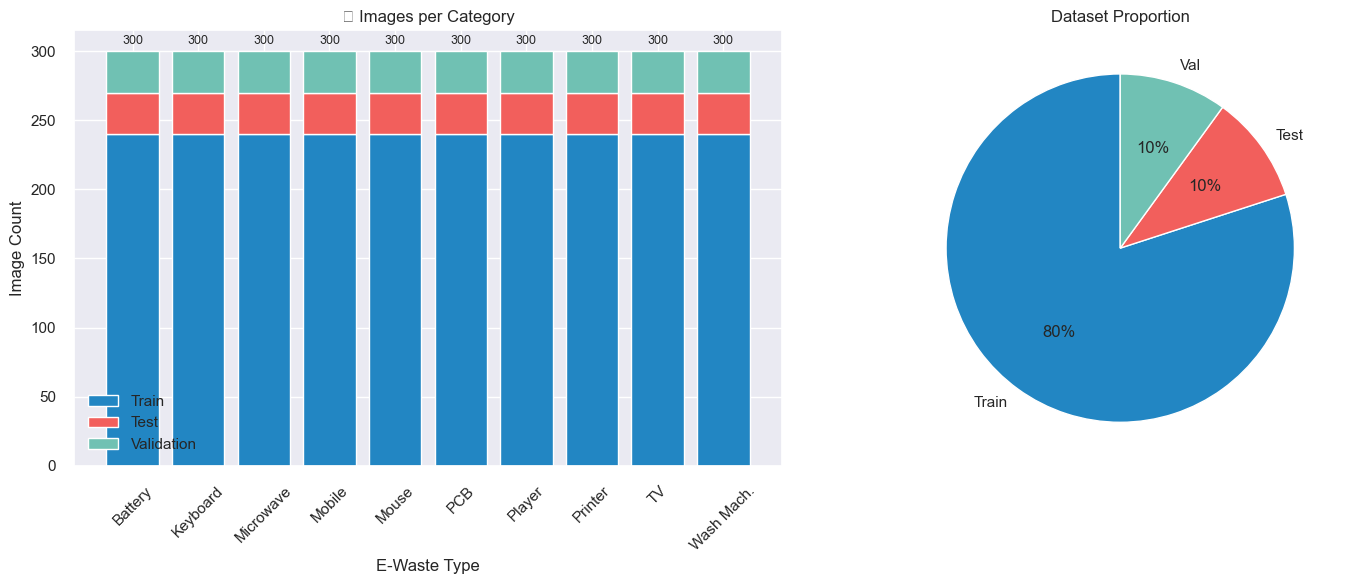

📊 Distribution Charts Rendered


In [26]:
# Step Five: Visual Analytics of Dataset Distribution
import matplotlib.pyplot as plt
fig, (b1, b2) = plt.subplots(1, 2, figsize=(15, 6))

cat_short = ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse',
             'PCB', 'Player', 'Printer', 'TV', 'Wash Mach.']

bars_train = overview_df['Training'].values
bars_test = overview_df['Testing'].values
bars_val = overview_df['Validation'].values

# Horizontal stacked bar
b1.bar(cat_short, bars_train, color="#2286c3", label='Train')
b1.bar(cat_short, bars_test, bottom=bars_train, color="#f25f5c", label='Test')
b1.bar(cat_short, bars_val, bottom=bars_train + bars_test, color="#70c1b3", label='Validation')

b1.set_title('📊 Images per Category')
b1.set_xlabel('E-Waste Type')
b1.set_ylabel('Image Count')
b1.tick_params(axis='x', rotation=45)
b1.legend()

# Add numbers on top
for i, value in enumerate(overview_df['Combined']):
    b1.text(i, value + 5, str(value), ha='center', fontsize=9)

# Pie chart
splits = [overview_df['Training'].sum(), overview_df['Testing'].sum(), overview_df['Validation'].sum()]
b2.pie(splits, labels=['Train', 'Test', 'Val'], autopct='%1.0f%%',
       colors=["#2286c3", "#f25f5c", "#70c1b3"], startangle=90)
b2.set_title("Dataset Proportion")

plt.tight_layout()
plt.show()

print("📊 Distribution Charts Rendered")


Battery: (150, 150)
Keyboard: (150, 150)
Microwave: (150, 150)
Mobile: (150, 150)
Mouse: (150, 150)
PCB: (150, 150)
Player: (150, 150)
Printer: (150, 150)
Television: (150, 150)
Washing Machine: (150, 150)


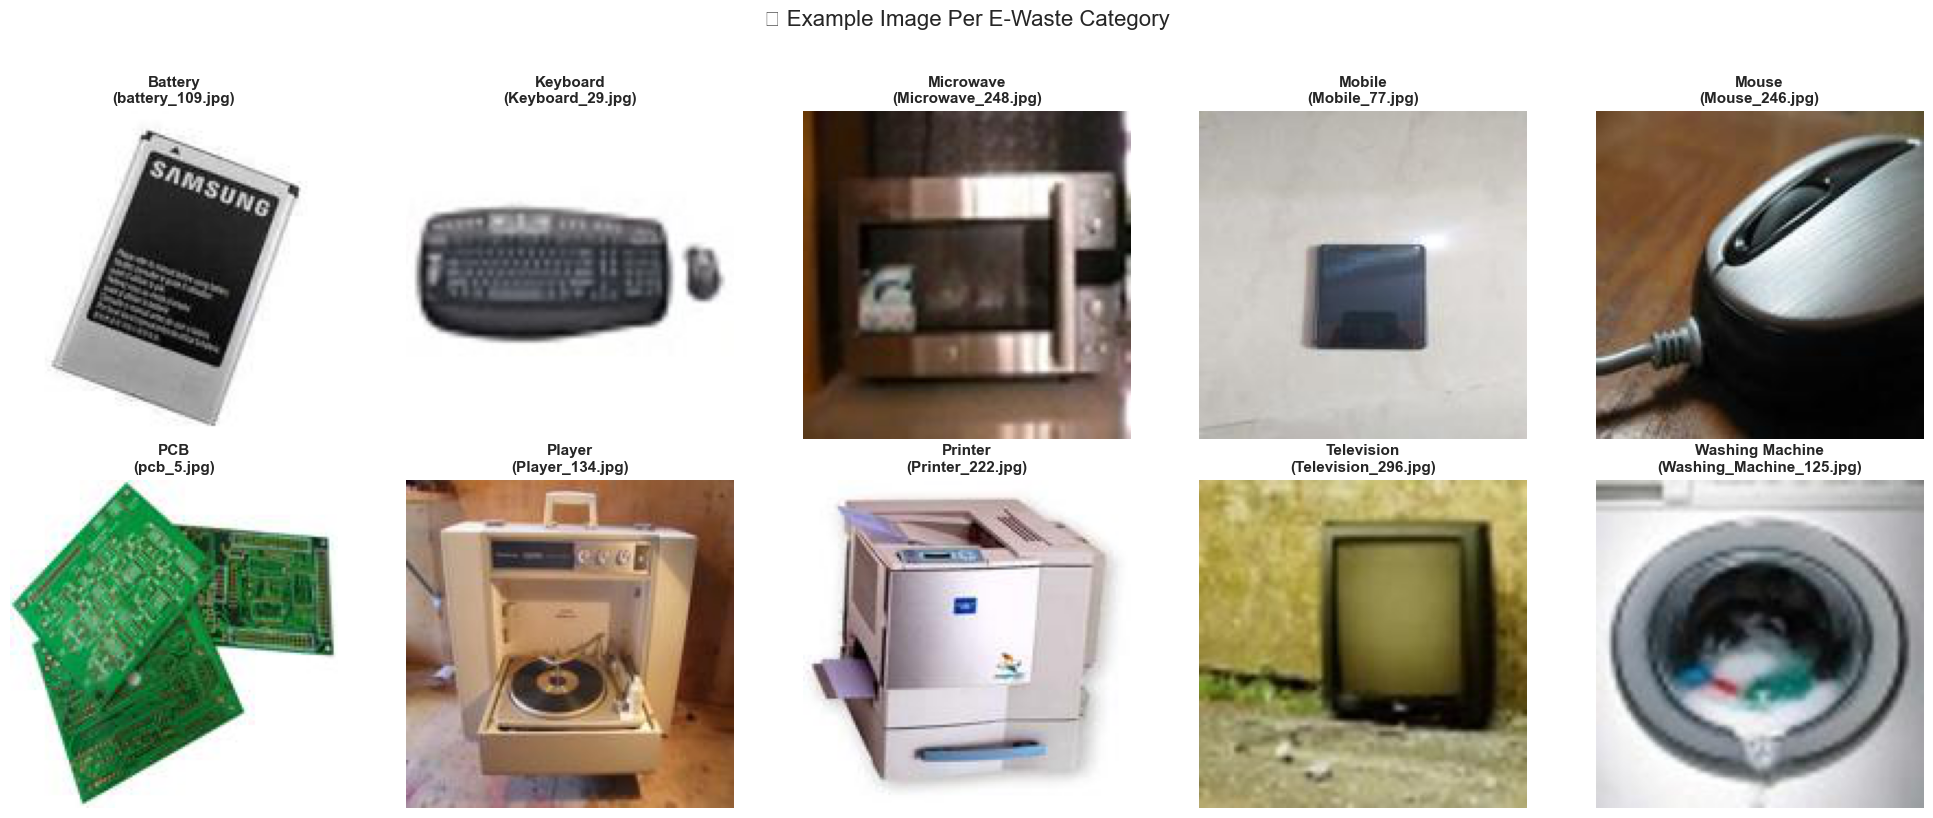

✔️ All 10 categories visualized


In [27]:
# Step Six: Display One Random Image Per Category
from PIL import Image
import random

fig, viewports = plt.subplots(2, 5, figsize=(20, 8))
viewports = viewports.flatten()

def sample_image(classname, folder='train'):
    location = root_data / folder / classname
    images = list(location.glob("*"))
    if images:
        chosen = random.choice(images)
        return Image.open(chosen), chosen.name
    return None, "No image found"

for i, item in enumerate(labels):
    try:
        picture, title = sample_image(item)
        viewports[i].imshow(picture)
        viewports[i].set_title(f"{item}\n({title})", fontsize=11, fontweight='bold')
        viewports[i].axis("off")
        print(f"{item}: {picture.size}")
    except Exception as problem:
        print(f"{item} - Error: {problem}")
        viewports[i].text(0.5, 0.5, f"Error\n{item}", ha='center', va='center', transform=viewports[i].transAxes)
        viewports[i].axis("off")

plt.suptitle("📷 Example Image Per E-Waste Category", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
print(f"✔️ All {len(labels)} categories visualized")
